In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import requests

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
books=pd.read_csv('Books.csv')
print(books.shape)
books.head()

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [4]:
ratings=pd.read_csv('Ratings.csv')
print(ratings.shape)
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [6]:
users=pd.read_csv('Users.csv')
print(users.shape)
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [8]:
books1=books.drop(['Image-URL-M','Image-URL-L'],axis=1)
print(books1.shape)
books1.head()

(271360, 6)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [9]:
print(books1.isnull().sum())
print(ratings.shape)
print(books1.shape)
books1_rating=books1.merge(ratings,on='ISBN')
print(books1_rating.shape)

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
dtype: int64
(1149780, 3)
(271360, 6)
(1031136, 8)


In [10]:
books1_rating.dropna(inplace=True)
print(books1_rating.shape)

(1031133, 8)


In [11]:
books1_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


# EDA

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

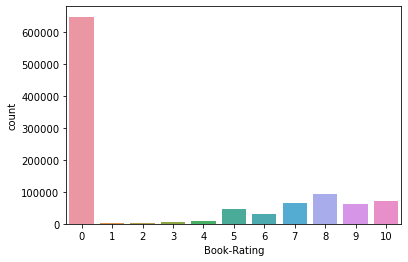

In [12]:
sns.countplot(books1_rating['Book-Rating'])

# Recommendation system

# 1.Most Popular Recommendation System

In [13]:
d={'Book-Rating':'No. of votes'}
rating1=books1_rating.groupby('Book-Title').agg({'Book-Rating':'count'}).reset_index().rename(columns=d)
print(rating1.head(2))

e={'Book-Rating':'Average Rating'}
rating2=books1_rating.groupby('Book-Title').agg({'Book-Rating':'mean'}).reset_index().rename(columns=e)
print(rating2.head(2))

final_ratings=rating1.merge(rating2,on='Book-Title')
final_ratings.head()


                                          Book-Title  No. of votes
0   A Light in the Storm: The Civil War Diary of ...             4
1                              Always Have Popsicles             1
                                          Book-Title  Average Rating
0   A Light in the Storm: The Civil War Diary of ...            2.25
1                              Always Have Popsicles            0.00


,Book-Title,No. of votes,Average Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


<AxesSubplot:xlabel='No. of votes'>

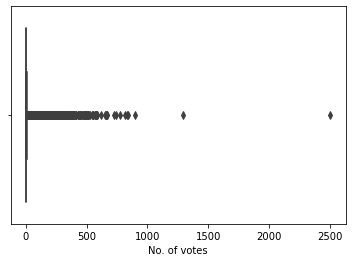

In [14]:
sns.boxplot(final_ratings['No. of votes'])

In [15]:
final_ratings['No. of votes'].quantile([0.1,0.25,0.5,0.75,0.9,1])

0.10       1.0
0.25       1.0
0.50       1.0
0.75       3.0
0.90       7.0
1.00    2502.0
Name: No. of votes, dtype: float64

In [16]:
# Recommending top 250 books with highest average ratings
popular_books=final_ratings[final_ratings['No. of votes']>250]
popular_books.sort_values(by='Average Rating',ascending=False,inplace=True)
popular_books.head()

,Book-Title,No. of votes,Average Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


0.6605101342545707
5.632008187652278


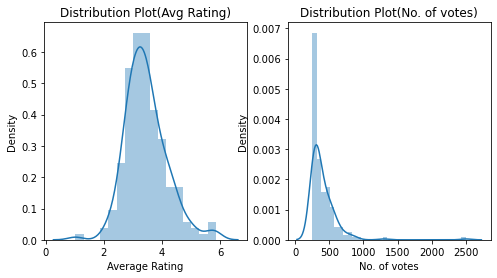

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(popular_books['Average Rating'])
plt.title('Distribution Plot(Avg Rating)')

plt.subplot(1,2,2)
sns.distplot(popular_books['No. of votes'])
plt.title('Distribution Plot(No. of votes)')

print(popular_books['Average Rating'].skew())
print(popular_books['No. of votes'].skew())

In [18]:
# Merge popular_books with books1 dataframe
popular_books1=popular_books.merge(books1,on='Book-Title',how='inner').drop_duplicates('Book-Title')
print(popular_books1.shape)
popular_books1.head()

(186, 8)


,Book-Title,No. of votes,Average Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...


In [19]:
# popular_books1.drop_duplicates('Book-Title',inplace=True)
print(popular_books1.shape)

(186, 8)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000283BA2AA1D0>

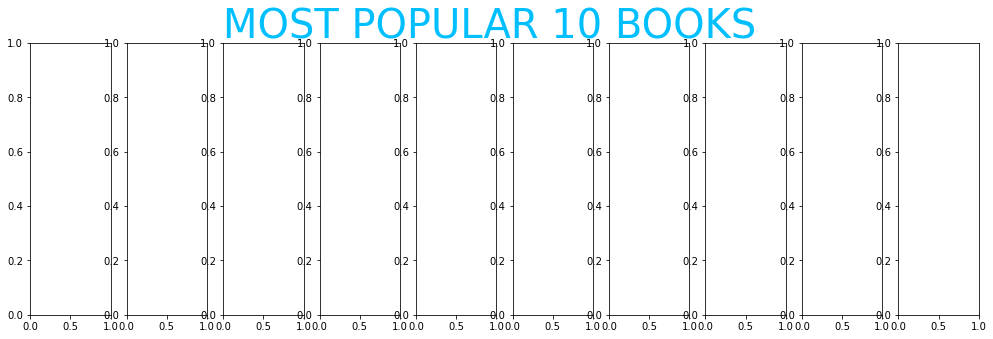

In [20]:
n=10
top_ten=popular_books1.head(10)
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("MOST POPULAR 10 BOOKS",fontsize=40,color="deepskyblue")
for i in range(len(top_ten["Book-Title"].tolist())):
    url=popular_books1.loc[popular_books1["Book-Title"]==top_ten["Book-Title"].tolist()[i],"Image-URL-S"][:1].values[0]
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(popular_books1[popular_books1["Book-Title"]==top_ten["Book-Title"].tolist()[i]]["Average Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)
    fig.show()

# 2. Collaborative Filtering Based Recommendation System

* consider knowledgable users only>> Users who gave rating to more than 200 books
* consider books above min rating >> Books with rating more than 50

In [21]:
books1_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [22]:
#knowledgable_users
x=books1_rating.groupby('User-ID').count()['Book-Rating']>200
print(type(x))
print(x.shape)
knowledgable_users=np.array(x[x].index)
print(len(knowledgable_users))

# print(books1_rating.shape)
filtered_rating=books1_rating[books1_rating['User-ID'].isin(knowledgable_users)]
# print(filtered_rating.shape)


<class 'pandas.core.series.Series'>
(92106,)
811


In [23]:
# Rated Books
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>50
rated_books=np.array(y[y].index)
print(len(rated_books))

#print(filtered_rating.shape)
final_rating=filtered_rating[filtered_rating['Book-Title'].isin(rated_books)]
#print(final_rating.shape)

679


In [24]:
pt = final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
print(pt.shape)
pt.head(3)

(679, 810)


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN


In [25]:
pt.fillna(0,inplace=True)

In [26]:
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(679, 679)

In [27]:
# function that will return recommendation for specified book
def recommendation(book_name,n):
    index=np.where(pt.index==book_name)[0][0]
    similar_book_indexes=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:n+1]
    similar_books=pd.DataFrame(columns=['Book-Title','Book-Author','Image-URL-L'])
    for i in range(n):
        temp_df=books[books['Book-Title']==pt.index[similar_book_indexes[i][0]]]
        #print(pt.index[similar_book_indexes[i][0]])
        similar_books_data=pd.DataFrame(columns=['Book-Title','Book-Author','Image-URL-L'])
        similar_books_data['Book-Title']=temp_df.drop_duplicates('Book-Title')['Book-Title'].values
        similar_books_data['Book-Author']=temp_df.drop_duplicates('Book-Title')['Book-Author'].values
        similar_books_data['Image-URL-L']=temp_df.drop_duplicates('Book-Title')['Image-URL-L'].values
        #print(similar_books_data)
        similar_books=pd.concat([similar_books,similar_books_data])
    
    similar_books.reset_index(inplace=True)
    similar_books.drop('index',axis=1,inplace=True)
    return similar_books
    

In [28]:
recommendation('1984',5)

,Book-Title,Book-Author,Image-URL-L
0,Animal Farm,George Orwell,http://images.amazon.com/images/P/0451526341.0...
1,The Handmaid's Tale,Margaret Atwood,http://images.amazon.com/images/P/0449212602.0...
2,Brave New World,Aldous Huxley,http://images.amazon.com/images/P/0060809833.0...
3,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,http://images.amazon.com/images/P/0345313860.0...
4,The Hours : A Novel,Michael Cunningham,http://images.amazon.com/images/P/0312243022.0...


In [29]:
final_rating.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating
50700,044022165X,The Rainmaker,JOHN GRISHAM,1996,Dell,http://images.amazon.com/images/P/044022165X.0...,258185,0
117950,0380718340,Cruel &amp; Unusual (Kay Scarpetta Mysteries (...,Patricia D. Cornwell,1994,Avon,http://images.amazon.com/images/P/0380718340.0...,78973,8
123311,1559029838,Call of the Wild,Jack London,0,Selldowns/no More Orders,http://images.amazon.com/images/P/1559029838.0...,11676,9
274473,080411868X,"Welcome to the World, Baby Girl!",Fannie Flagg,1999,Ballantine Books,http://images.amazon.com/images/P/080411868X.0...,153662,0
71839,0440224624,The Loop,Nicholas Evans,1999,Dell Publishing Company,http://images.amazon.com/images/P/0440224624.0...,148744,0


In [30]:

fig.suptitle("Your Purchased BOOK",fontsize=40,color="deepskyblue")
ax=plt.figure(figsize=(5,5))
ind=books[books['Book-Title']==book_name].index[0]
url=books.loc[ind,"Image-URL-L"]
img = Image.open(requests.get(url,stream=True).raw)
plt.imshow(img)
ax.show(img)
plt.title("Your book")


NameError: name 'book_name' is not defined

<Figure size 360x360 with 0 Axes>

In [31]:


top_recommendations=recommendation(book_name,n)
ig,ax=plt.subplots(1,n,figsize=(17,5))
fig.suptitle("MOST recommended BOOKS",fontsize=40,color="deepskyblue")
for i in range(len(top_recommendations.index)):
    url=top_recommendations.loc[i,'Image-URL-L']
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    
    #ax[i].set_title("RATING: {} ".format(round(popular_books1[popular_books1["Book-Title"]==top_ten["Book-Title"].tolist()[i]]["Average Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)
    fig.show()
plt.xlabel("you can also look for",loc="center",fontsize=40,color="deepskyblue")

NameError: name 'book_name' is not defined

In [32]:
top_recommendations.head()

NameError: name 'top_recommendations' is not defined

In [33]:
recommendation('Phantoms', 10)




,Book-Title,Book-Author,Image-URL-L
0,Whispers,BELVA PLAIN,http://images.amazon.com/images/P/0440216745.0...
1,Pet Sematary,Stephen King,http://images.amazon.com/images/P/0451162072.0...
2,GARDEN OF SHADOWS (Dollanger Saga (Paperback)),Ariel Jennifer Jones,http://images.amazon.com/images/P/067164257X.0...
3,Fear Nothing,DEAN KOONTZ,http://images.amazon.com/images/P/0553579754.0...
4,Skeleton Crew,Stephen King,http://images.amazon.com/images/P/0451168615.0...
5,The Dark Half,Stephen King,http://images.amazon.com/images/P/0451167317.0...
6,Watchers,Dean R. Koontz,http://images.amazon.com/images/P/0425188809.0...
7,Hideaway,Dean R. Koontz,http://images.amazon.com/images/P/042513525X.0...
8,Carrie,Stephen King,http://images.amazon.com/images/P/0451157443.0...
9,Toxin,Robin Cook,http://images.amazon.com/images/P/0425166619.0...


In [34]:
t=recommendation('Whispers', 10)
print(t.loc[0,'Image-URL-L'])

http://images.amazon.com/images/P/0553582933.01.LZZZZZZZ.jpg
